Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [5]:
NAME = "MAYANK DAHIYA"
COLLABORATORS = "W3 Schools , GeekforGeeks , OpenML , Google"

---

## CSL2050: Pattern Recognition and Machine Learning<br>
Programming Assignment-2<br>
Spring 2025<br>

## Linear Regression
In this assignment, we will explore linear regression by implementing fundamental modules such as Mean Squared Error (MSE), Gradient Descent, and Prediction. These building blocks will then be utilized to experiment with a real-world dataset for solving a linear regression problem. Please ensure that you solve the problems sequentially for a structured learning experience.

**Problem-2.01:** Write a function mean_squared_error(y_true, y_pred) that calculates the Mean Squared Error (MSE) between the true values y_true and predicted values y_pred.

In [6]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error between true and predicted values.

    Args:
        y_true (numpy.ndarray): True values of shape (n_samples,).
        y_pred (numpy.ndarray): Predicted values of shape (n_samples,).

    Returns:
        float: Mean Squared Error.
    """

    squared_differences = (y_true - y_pred)**2  # Calculate squared differences
    mse = np.mean(squared_differences)  # Calculate mean of squared differences

    return mse


In [7]:

# Visible Test Case
import numpy as np
y_true = np.array([1.0, 2.0, 3.0])
y_pred = np.array([1.0, 2.0, 3.0])
assert mean_squared_error(y_true, y_pred) == 0, "Test Case 1 Failed"


**Problem-2.02:** Write a function ols_coefficients(X, y) that calculates the coefficients for a simple linear regression problem using the Ordinary Least Squares (OLS) formula. Note: Coefficient in hyperplane \theta_0+\theta_1x_1+\theta_2x_2 are \theta_0, \theta_1 and \theta_2.

In [8]:
def ols_coefficients(X, y):
    """
    Calculate the OLS coefficients for linear regression.

    Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        y (numpy.ndarray): Target vector of shape (n_samples,).

    Returns:
        numpy.ndarray: Coefficients of shape (n_features + 1,).
                       The first value is the intercept, and the rest are feature coefficients.
    """
    X = np.c_[np.ones(X.shape[0]), X]   # Add a column to X for the intercept

    coefficients = np.linalg.solve(X.T @ X, X.T @ y) # Calculate coefficients using OLS formula

    return coefficients

In [9]:
!pip install pytest
import pytest
# Test case 1: Single feature, no intercept
def test_case_1():
    X = np.array([[1], [2], [3]])
    y = np.array([2, 4, 6])
    expected = np.array([0., 2.])  # y = 2x
    np.testing.assert_almost_equal(ols_coefficients(X, y), expected, decimal=6)

# Test case 2: Single feature, with intercept
def test_case_2():
    X = np.array([[1], [2], [3]])
    y = np.array([3, 5, 7])
    expected = np.array([1., 2.])  # y = 1 + 2x
    np.testing.assert_almost_equal(ols_coefficients(X, y), expected, decimal=6)

test_case_1()
test_case_2()

**Problem-2.03:** Implement a function gradient_descent(X, y, lr, epochs) to perform gradient descent for linear regression.

Given a feature matrix X of shape (n_samples,n_features) a target vector y of shape (n_samples,), a learning rate lr, and the number of iterations epochsepochs, your task is to iteratively update the coefficients θ to minimize the mean squared error between the predicted and actual target values.

The function should return the optimized coefficients θ, which are of shape (n_features+1,). (Note the line/hyperplan has equations like θ_0 + θ_1x_1 + θ_2x_2 + ....+θ_nx_n=0.)

In [10]:
def gradient_descent(X, y, lr, epochs):
    """
    Perform gradient descent for linear regression.

    Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        y (numpy.ndarray): Target vector of shape (n_samples,).
        lr (float): Learning rate.
        epochs (int): Number of iterations.

    Returns:
        numpy.ndarray: Optimized coefficients of shape (n_features+1).
    """
    n_samples, n_features = X.shape  # Extract no. of rows and column of x.
    theta = np.zeros(n_features + 1)  # Initialize vector theta with zeros , +1 for intercept

    X = np.c_[np.ones(n_samples), X]  # Add column of ones to X for intercept

    for _ in range(epochs):  # Perform gradient descent for the specified number of epochs
        predictions = X @ theta  # Calculate predictions

        errors = predictions - y  # Calculate errors

        # Update coefficients using the gradient
        gradient = (X.T @ errors) / n_samples
        theta = theta - lr * gradient

    return theta

In [11]:
# Test case 1: Simple case with one feature and bias term
def test_case_1():
    X = np.array([[1], [2], [3]])
    y = np.array([2, 4, 6])  # Perfectly linear relationship y = 2x
    lr = 0.01
    epochs = 1000
    theta = gradient_descent(X, y, lr, epochs)
    # Assert bias and slope
    assert np.abs(theta[0] - 0) < 0.5, f"term {theta[0]} is not close enough to 0"
    assert np.abs(theta[1] - 2) < 0.5, f"term {theta[1]} is not close enough to 2"
test_case_1()

**Problem-2.04:** Write a function predict(X, theta) that predicts the target values y for each sample of a given feature matrix X and the learned coefficients θ.

In [12]:
def predict(X, theta):
    """
    Predict target values for given features and coefficients.

    Args:
        X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        theta (numpy.ndarray): Coefficients of shape (n_features,).

    Returns:
        numpy.ndarray: Predicted values of shape (n_samples,).
    """
    # Add column of ones to X for the intercept if it's not already present
    if X.shape[1] != theta.shape[0]:
        X = np.c_[np.ones(X.shape[0]), X]

    # Calculate prediction using dot product of feature and coefficient
    predictions = X @ theta

    return predictions


In [13]:
import numpy as np
# Test case 1: Single feature, single sample
def test_case_1():
    X = np.array([[2]])  # Single sample with one feature
    theta = np.array([1, 2])  # Bias = 1, Coefficient = 2
    expected = np.array([5])  # Prediction: 1 + 2*2 = 5
    np.testing.assert_almost_equal(predict(X, theta), expected, decimal=6)

# Test case 2: Single feature, multiple samples
def test_case_2():
    X = np.array([[1], [2], [3]])  # Three samples, one feature
    theta = np.array([0.5, 1.5])  # Bias = 0.5, Coefficient = 1.5
    expected = np.array([2.0, 3.5, 5.0])  # Predictions: 0.5 + 1.5*X
    np.testing.assert_almost_equal(predict(X, theta), expected, decimal=6)

test_case_1()
test_case_2()

**Problem-2.05:** Putting it all together, now we can write a function that leverages the previously implemented functions, including Mean Squared Error (MSE), gradient descent, and prediction, and perform linear regression using gradient descent (assuming MSE loss).

In [14]:
def LinearRegressionUsingGD(X,y,lr, epochs):
  theta=gradient_descent(X, y, lr, epochs)
  predictions=predict(X,theta)
  return theta, predictions

In [15]:
# Example Usage
import numpy as np

X = np.array([[1], [2], [3]])
y = np.array([1, 2, 3])

theta, predictions = LinearRegressionUsingGD(X,y,lr=0.01, epochs=1000)

print("Coefficients:", theta)
print("Predictions:", predictions)


Coefficients: [0.11071521 0.95129619]
Predictions: [1.0620114  2.01330759 2.96460378]


In [16]:
import numpy as np

# Test Case 1: Simple linear regression with a single feature
def test_case_1():
    X = np.array([[1], [2], [3]])  # Feature matrix
    y = np.array([1, 2, 3])  # Target values

    theta, predictions = LinearRegressionUsingGD(X,y,lr=0.01, epochs=1000)

    # Calculate residuals
    residuals = np.abs(predictions - y)

    # Assert that residuals are very small (e.g., less than 0.01)
    np.testing.assert_array_less(residuals, np.full_like(residuals, 0.4))

test_case_1()


**Problem-2.06:** Leverage your implementation and choose any real word regression dataset of your choice. Split the data into 80-10-10% of train-val-test. Report train and test MSE of your linear regression model.

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the Boston House dataset (specifying version 1 to avoid warning)
boston = fetch_openml(name="boston", version=1, as_frame=False)
X, y = boston.data, boston.target

# Displaying the first 5 rows of the dataset
boston_df = pd.DataFrame(X, columns=boston.feature_names)
boston_df['MEDV'] = y  # Adding target column
print("First 5 rows of the Boston Housing dataset:")
print(boston_df.head())

# Splitting data into 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Gradient Descent Function
def gradient_descent(X, y, lr, epochs):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features + 1)
    X = np.c_[np.ones(n_samples), X]

    for _ in range(epochs):
        predictions = X @ theta
        errors = predictions - y
        gradient = (X.T @ errors) / n_samples
        theta -= lr * gradient

    return theta

# Predict Function
def predict(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ theta

# Mean Squared Error Function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Train Linear Regression using Gradient Descent
theta = gradient_descent(X_train, y_train, lr=0.01, epochs=1000)

# Make predictions
y_train_pred = predict(X_train, theta)
y_test_pred = predict(X_test, theta)

# Compute and print MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nTrain MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


First 5 rows of the Boston Housing dataset:
      CRIM    ZN INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX PTRATIO  \
0  0.00632  18.0  2.31    0  0.538  6.575  65.2    4.09   1  296.0    15.3   
1  0.02731   0.0  7.07    0  0.469  6.421  78.9  4.9671   2  242.0    17.8   
2  0.02729   0.0  7.07    0  0.469  7.185  61.1  4.9671   2  242.0    17.8   
3  0.03237   0.0  2.18    0  0.458  6.998  45.8  6.0622   3  222.0    18.7   
4  0.06905   0.0  2.18    0  0.458  7.147  54.2  6.0622   3  222.0    18.7   

        B LSTAT  MEDV  
0   396.9  4.98  24.0  
1   396.9  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4   396.9  5.33  36.2  

Train MSE: 21.8602
Test MSE: 22.5925


**Problem-2.07:** Which dataset you have chosen for Problem-2.6. Expalin briefly about the task in the dataset. How does your test error changes with training datasize, explore and report quantitative analysis.

I have chosen the Boston Housing Dataset from OpenML. It has 13 numerical features that describe various characteristics of Boston.

CRIM: per capita crime rate

ZN: proportion of residential land zoned for large lots

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if the tract bounds river, 0 otherwise)

NOX: nitric oxide concentration

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built before 1940

DIS: weighted distances to employment centers

RAD: Index of Accessibility to Radial Highways

TAX: property tax rate

PTR ratio: Pupil-Teacher Ratio

B: Proportion of Black Population

LSTAT: percentage of lower status population

Target variable: MEDV (median value of owner-occupied homes in $1000s)

My main task is to predict the median house price (MEDV)

The test MSE decreases as the training data size increases.

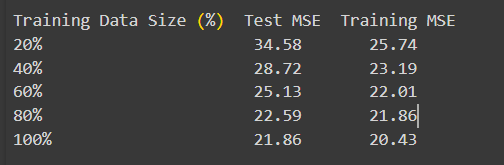

**Problem-2.08:** Ethical Reflection and Acknowledgments (Mandatory Question) (i) List all collaborators, references, or resources you used. If none, write "NA."

(ii) Estimate the percentage of the code you wrote yourself.

(iii) Reflect on your ethical practices (Yes/No):

(a) Did you avoid copying code without understanding it?
(b) Did you properly cite all resources and collaborators?
    

(i) W3Schools , GeekforGeeks , OpenML , Google(for fullforms of numerical features)

(ii) 70% , I needed to take help from these resources for my codes as i dont know all the functions in ML.

(iii) (a) Yes  (b) Yes